<a href="https://colab.research.google.com/github/nazwa48/PCVK-_GENAP_2024/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## LAPORAN PCVK Jobsheet 5

---


NIM : 2241720013

Nama : Nazwa Ayunda Mirrohillah

Kelas : TI-3C

# TUGAS PRAKTIKUM


> Akses Folder image pada Google Drive:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


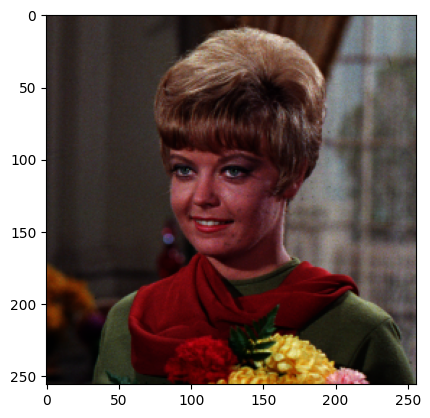

In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

img_f = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
img_rgb = cv.cvtColor(img_f,cv.COLOR_BGR2RGB) # konversi channel BGR -> RGB
plt.imshow(img_rgb)

1. **Buat Gamma Correction sesuai dengan petunjuk berikut**
Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai
Gamma akan diset dengan meminta masukan dari pengguna. Berikut adalah kode untuk
meminta masukan nilai dari pengguna. Lanjutkan kode tersebut dengan membuat image
dengan gamma correction sesuai rumus yang telah diberikan.

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


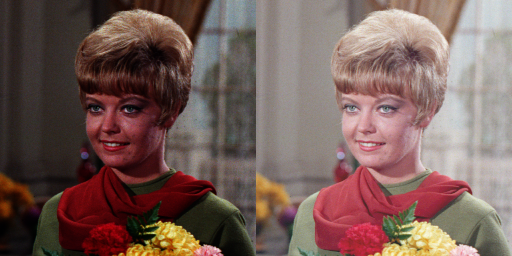

In [3]:
#TUGAS PRAKTIKUM
#Nomer 1

print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

original = cv.cvtColor(img_rgb,cv.COLOR_BGR2RGB)
gamma_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
     gamma_image[y,x,c] = np.clip(255 * pow(original[y,x,c] / 255, (1 / gamma)), 0, 255)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)


2. **Buat Simulasi Image Depth**
Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi citra,
pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit). Pada
pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga
255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0 (000
0000) hingga 127 (111 1111). Kemungkinan warna didapat dari pangkat 2 jumlah bit. Jika
7bit, maka jumlah warnanya adalah 27 = 128, dst.
Berikut adalah kode untuk membaca citra masukan dan memberi nilai kedalaman citra,
silahkan lanjutkan kode program berikut sehingga menghasilkan keluaran seperti contoh
pada Gambar

Image Depth pada citra
----------------------


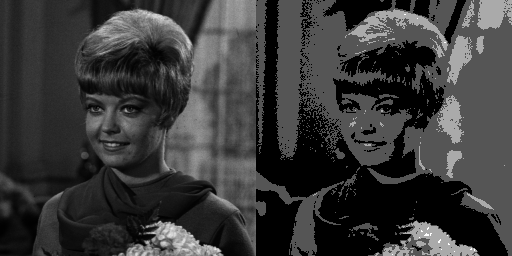

In [4]:
#2. Buat simulasi image depth
#Nomor 2

print('Image Depth pada citra')
print('----------------------')

bit_depth = 2
level = 255 / (pow(2,bit_depth)-1)
original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff', cv.IMREAD_GRAYSCALE)
img_depth = np.zeros(original.shape,original.dtype)

# melakukan akses setiap piksel pada grayscale
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    img_depth[y,x] = np.clip(round(original[y,x] / level)*level,0,255)

final_frame = cv.hconcat((original,img_depth))
cv2_imshow(final_frame)

3. **Buat modul Average Denoising**
Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub bab
sebelumnya.
Citra asli sudah disediakan pada /images/galaxy.jpg.
100 Citra dengan Gaussian Noise sudah disediakan pada /images/noises/*.jpg
Anda dapat menggunakan code berikut untuk membaca semua image dalam satu folder ,
gunakan modul glob (import glob)

In [11]:
# membaca citra asli
original_img = cv.imread('/content/drive/MyDrive/PCVK/Images/galaxy.jpg')

# membaca semua citra yang tersimpan dalam satu folder
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Images/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)

denoised_img = np.zeros(cv_img[0].shape)
jmlGambar = 10
for i in range(jmlGambar):
  denoised_img = denoised_img + cv_img[i]
denoised_img = np.uint16(denoised_img/jmlGambar)

psnr = PSNR(original_img,denoised_img)

print('Nilai PSNR dengan 10 citra : ', psnr, ' dB')
cv2_imshow(cv_img[0])
cv2_imshow(denoised_img)

IndexError: list index out of range

4. Buat image masking untuk image berikut. Image kiri adalah image asli (images/couple.tiff),
sedangkan image paling kanan adalah hasilnya:

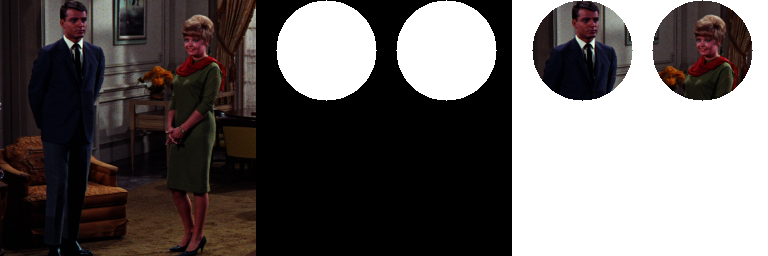

In [13]:
# menggunakan operator and
img = cv.imread('/content/drive/MyDrive/PCVK/Images/couple.tiff')
mask = np.zeros(img.shape,dtype=np.uint8)
mask = cv.circle(mask, (70,50), 50, (255,255,255), -1)

mask2 = np.zeros(img.shape, dtype=np.uint8)
mask2 = cv.circle(mask, (190,50), 50, (255,255,255), -1)

result = img & mask & mask2
result[mask==0] = 255

final_frame = cv.hconcat((img,mask,result))
cv2_imshow(final_frame)

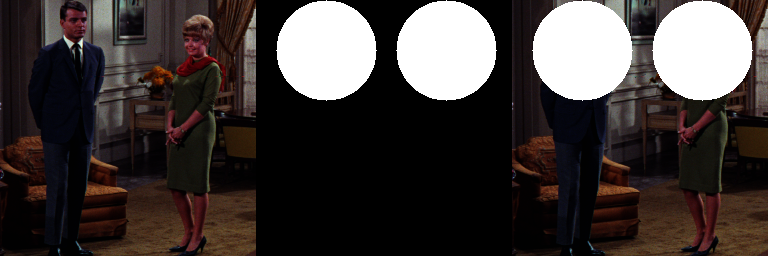

In [14]:
# menggunakan operator or

mask = np.zeros(img.shape,img.dtype)
mask = cv.circle(mask, (70,50), 50, (255,255,255), -1)

result = img & mask

mask2 = np.zeros(img.shape, img.dtype)
mask2 = cv.circle(mask, (190,50), 50, (255,255,255), -1)

result = img & mask2

masked = img | mask

final_frame = cv.hconcat((img,mask,masked))
cv2_imshow(final_frame)

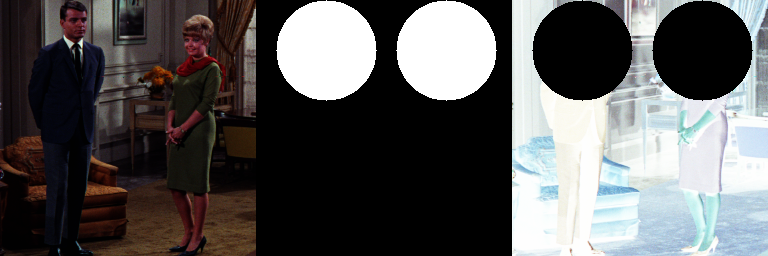

In [15]:
# menggunakan operator not

mask = np.zeros(img.shape,dtype=np.uint8)
mask = cv.circle(mask, (70,50), 50, (255,255,255), -1)

result = img & mask

mask2 = np.zeros(img.shape,dtype=np.uint8)
mask2 = cv.circle(mask, (190,50), 50, (255,255,255), -1)

result = img & mask2

masked = ~img & ~mask

final_frame = cv.hconcat((img, mask, masked))
cv2_imshow(final_frame)

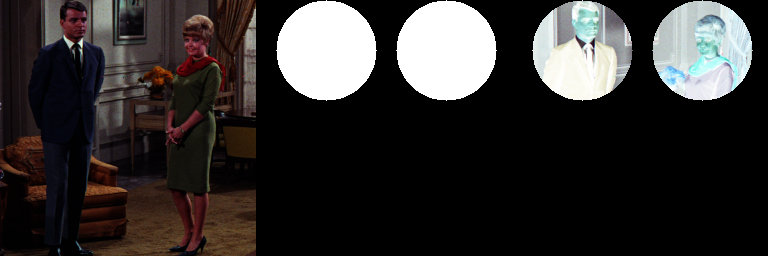

In [16]:
# menggunakan operator nand

mask = np.zeros(img.shape,dtype=np.uint8)
mask = cv.circle(mask, (70,50), 50, (255,255,255), -1)
mask2 = np.zeros(img.shape,dtype=np.uint8)
mask2 = cv.circle(mask, (190,50), 50, (255,255,255), -1)

masked = ~img & mask

final_frame = cv.hconcat((img, mask, masked))
cv2_imshow(final_frame)

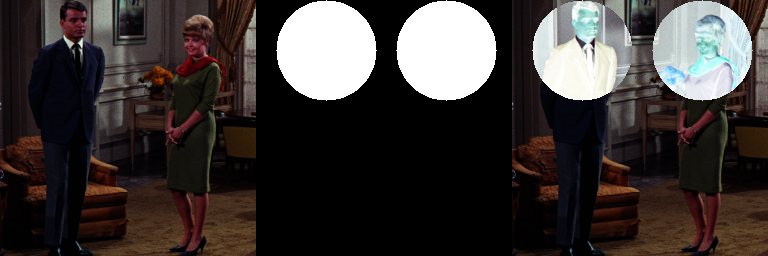

In [17]:
# menggunakan operator xor

mask = np.zeros(img.shape,dtype=np.uint8)
mask = cv.circle(mask, (70,50), 50, (255,255,255), -1)
mask2 = np.zeros(img.shape,dtype=np.uint8)
mask2 = cv.circle(mask, (190,50), 50, (255,255,255), -1)

masked = cv.bitwise_xor(img, mask)

final_frame = cv.hconcat((img, mask, masked))
cv2_imshow(final_frame)

Dari percobaan image masking di atas dapat disimpulkan bahwa :
- AND merupakan operator yang menghasilkan masking pada bagian selain circle.
- OR merupakan operator yang menghasilkan masking pada bagian circle.
- NOT merupakan operator yang menghasilkan masking pada circle dengan warna hitam dan citra negatif pada pixel selain bagian masking.
- NAND merupakan operator yang menghasilkan masking pada bagian selain circle dengan warna hitam dan citra negatif pada pixel selain bagian masking.
- XOR merupakan operator yang menghasilkan masking pada bagian circle dengan citra negatif dan warna asli pada pixel selain bagian masking.